In [1]:
import torch
import numpy as np
import random
from torch.utils.data import DataLoader
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data.dataset import random_split

import torch.nn as nn
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
from tabulate import tabulate
from IPython.display import clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data



import sys
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Experimental_setup")
from Experiment_v5 import Experiment
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Training")
from Training_Networks import Training
sys.path.append("/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Analysis")
from Check import Checkup



sys.path.append("/Users/charlottebeylier/Documents/PhD/Atari1.0/Reinforcement-Learning_modif/cgames/02_space_invader/Analysis")
from Manifold_Analysis import Manifold_analysis



from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.metrics import pairwise_distances

from matplotlib.ticker import NullFormatter
from collections import OrderedDict
from functools import partial
from sklearn import manifold, datasets

In [3]:
# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

def set_seed(seed=None, seed_torch=True):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)

    print(f'Random seed {seed} has been set.')

SEED = 2021
set_seed(seed=SEED)
# if gpu is to be used
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#print("Device: ", device)

G_SEED = torch.Generator()
G_SEED.manual_seed(SEED)

Device:  cpu
Random seed 2021 has been set.


# Multi

## Generate the Dataset

In [4]:
WIDTH = 100
BATCH_SIZE = 32
Names_hook = ["fc1","fc2","fc3"]
set_seed(seed=SEED)

experiment = Experiment(width = WIDTH,batch_size=BATCH_SIZE,size_output_multi = 2)


dataset_train,dataset_space_train,dataset_weather_train,dataset_val,dataset_space_val,dataset_weather_val,dataset_test,dataset_space_test,dataset_weather_test= experiment.Generate_data()
train_loader = torch.utils.data.DataLoader(dataset_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_multi = torch.utils.data.DataLoader(dataset_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

Random seed 2021 has been set.
Test size dataset space torch.Size([999, 6])
Test size dataset weather torch.Size([999, 6])
Train size dataset space torch.Size([7000, 6])
Train size dataset weather torch.Size([7000, 6])


## Analyse Parameters

In [7]:
do_analysis  = True
type = 1
frequence = 20

# Multi

## Parameters Network

In [6]:
Input_Dimension = 6
Nodes_Second = 20
Nodes_Third =10
Output_Dimension = 2

## Train network and visualize representation every N epochs

Epoch 490, val_loss 0.056688183829897924


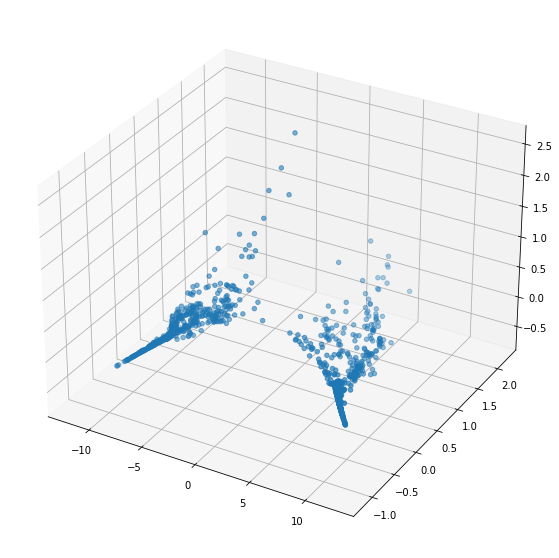

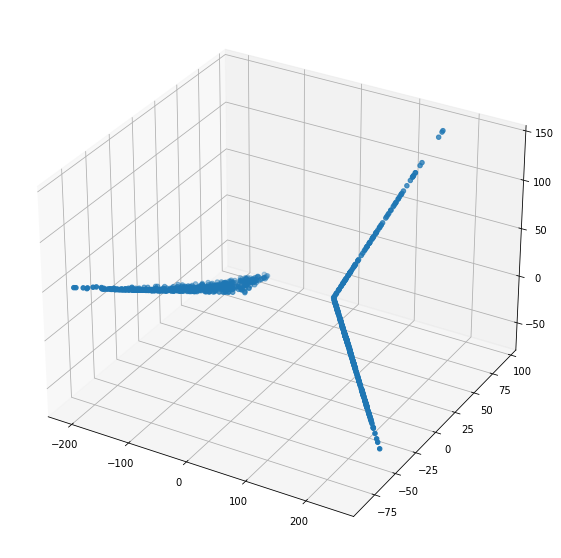

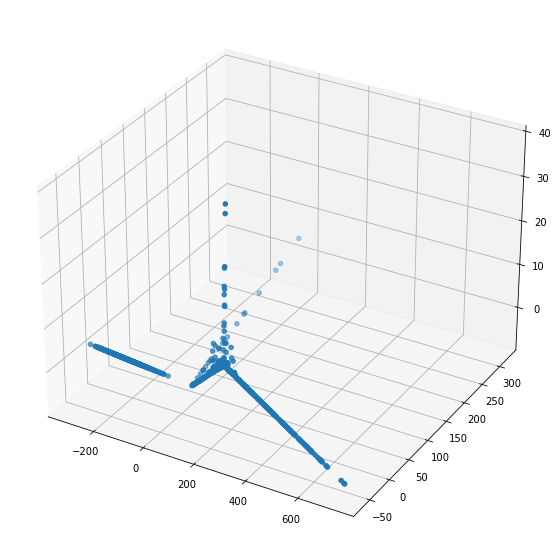

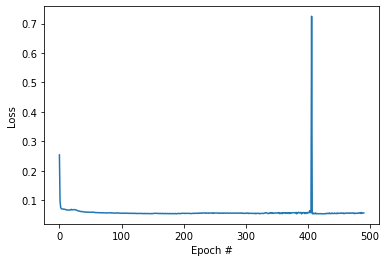

In [8]:
EPOCH = 500
Multi_losses = []
representation_analysis = True

training = Training()
model,val_losses = training.training_multi(Input_Dimension,Nodes_Second,Nodes_Third,Output_Dimension,EPOCH,train_loader,val_loader,test_loader_multi,do_analysis,type,frequence)
Multi_losses.append(val_losses)
            

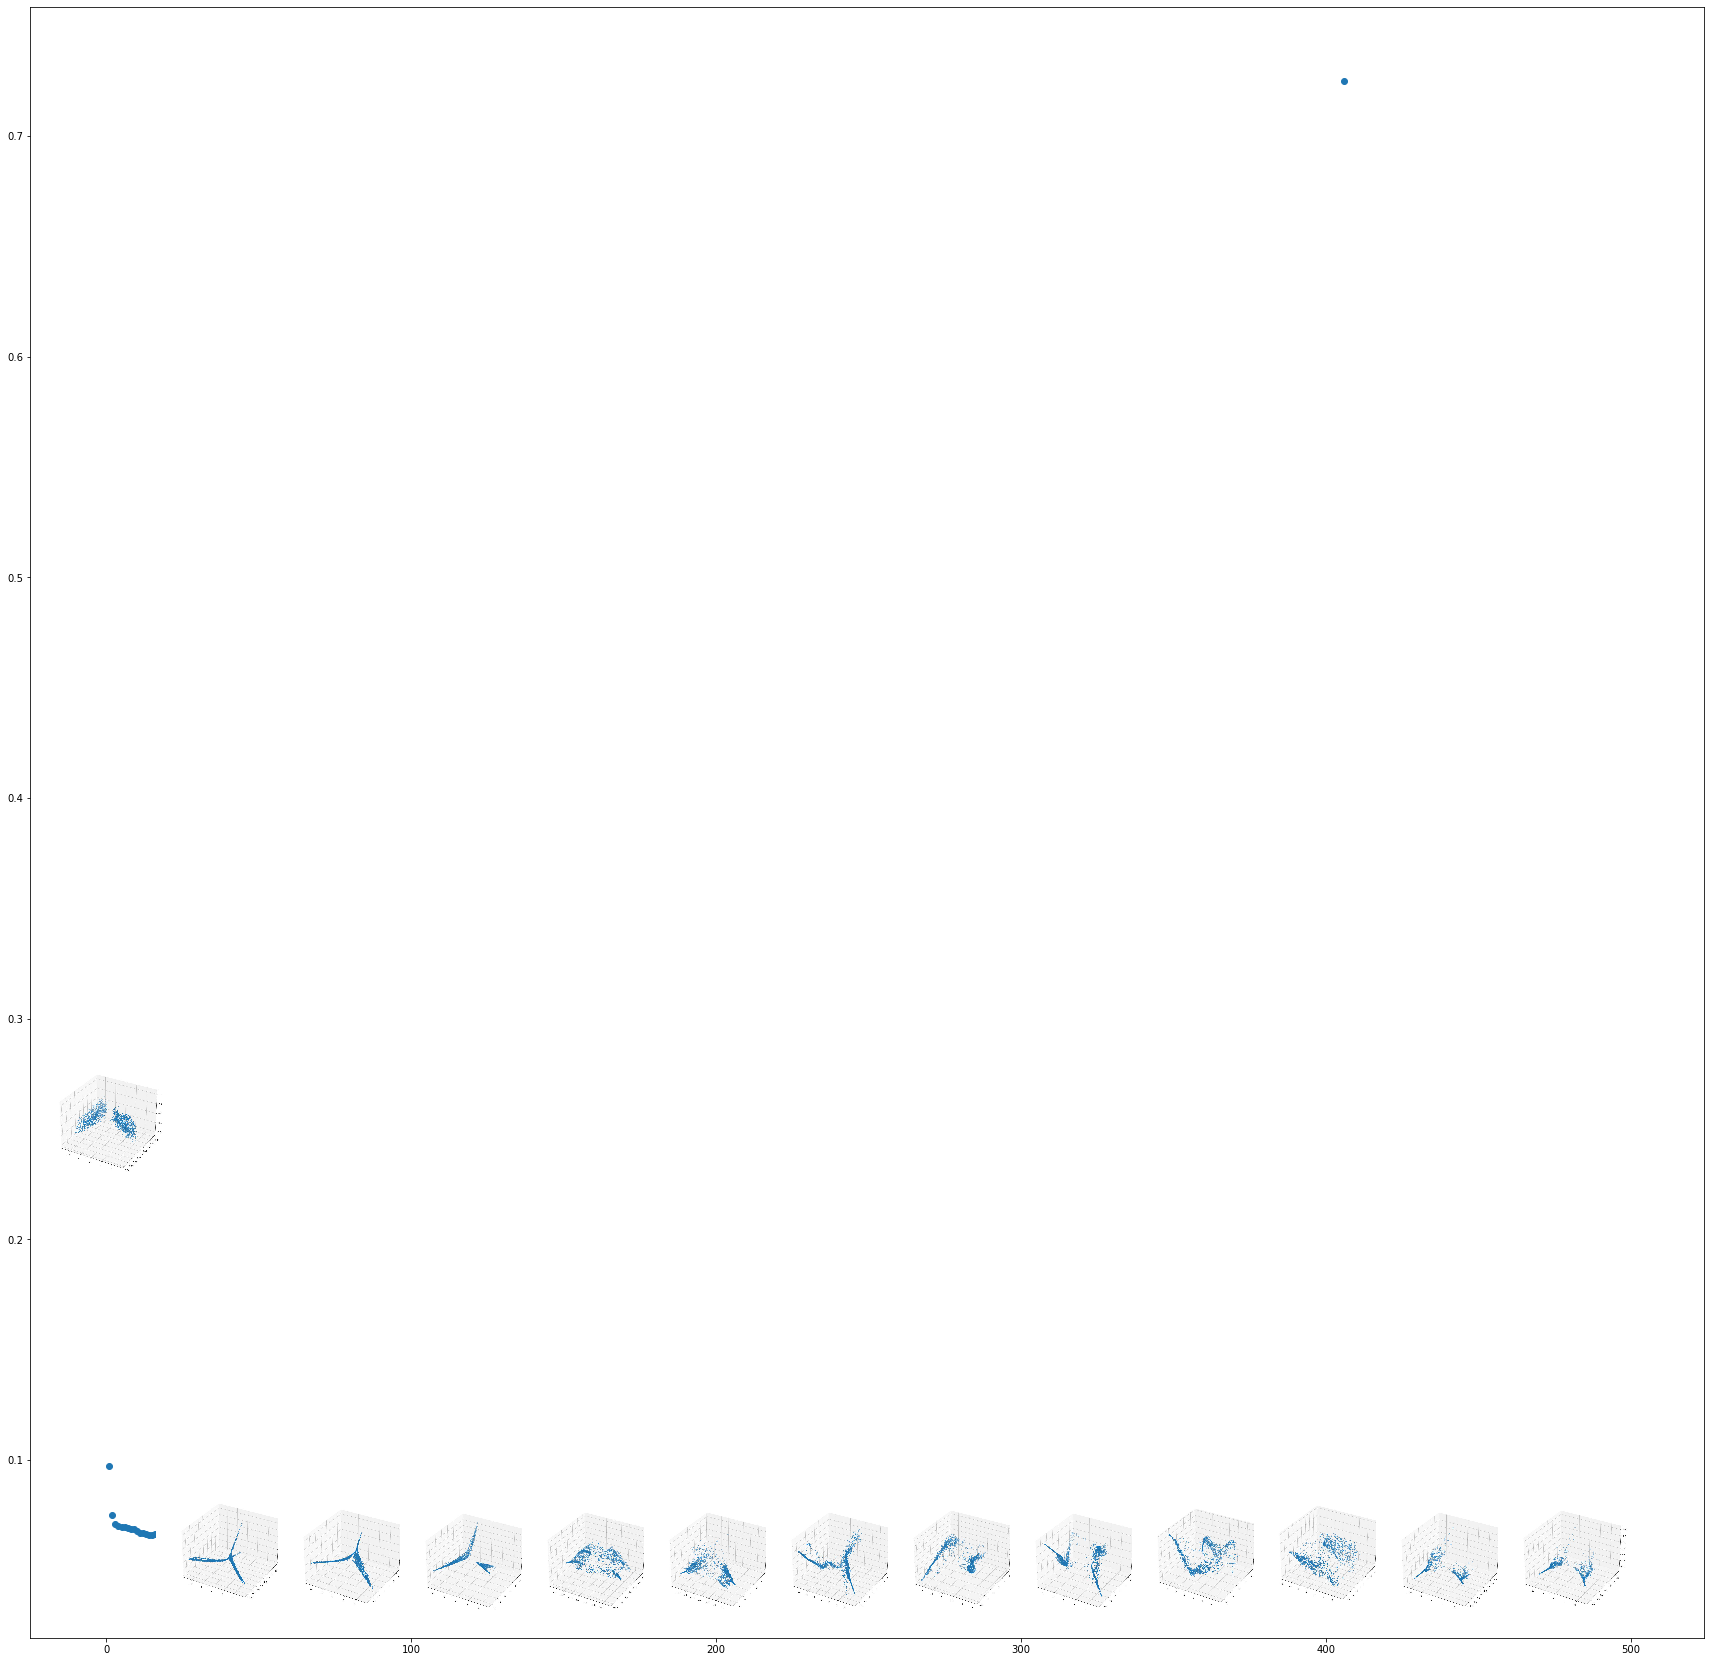

In [21]:
epochs = [i for i in range(len(val_losses))]
parent_dir = "/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Result_learning_representation"

def main(x,y):
    fig, ax = plt.subplots(figsize=(30,30))
    imscatter(x,y,  zoom=0.2, ax=ax)
    ax.scatter(x,y ,marker='o')   
    plt.show()

def imscatter(x, y, ax=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    artists = []
    i = 0
    for x0, y0 in zip(x, y):
        if np.mod(i,2*frequence) == 0:
            image = os.path.join(parent_dir,"Multi","fc1","step_"+str(i)+".jpg")
            if ax is None:
                ax = plt.gca()
            try:
                image = plt.imread(image)
            except TypeError:
                # Likely already an array.''..
                pass
            im = OffsetImage(image, zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
            artists.append(ax.add_artist(ab))
        i+=1
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main(epochs,val_losses)

## WEATHER

In [4]:
train_loader = torch.utils.data.DataLoader(dataset_weather_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_weather_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_weather = torch.utils.data.DataLoader(dataset_weather_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

In [5]:
Nodes_Second = 20
Nodes_Third = 5
Output_Dimension = 2

In [ ]:
EPOCH = 500
Weather_losses = []

training = Training()
model,val_losses = training.training_individual(5,Nodes_Second,Nodes_Third,EPOCH,train_loader,val_loader,test_loader_weather,do_analysis,"Weather")
Weather_losses.append(val_losses)

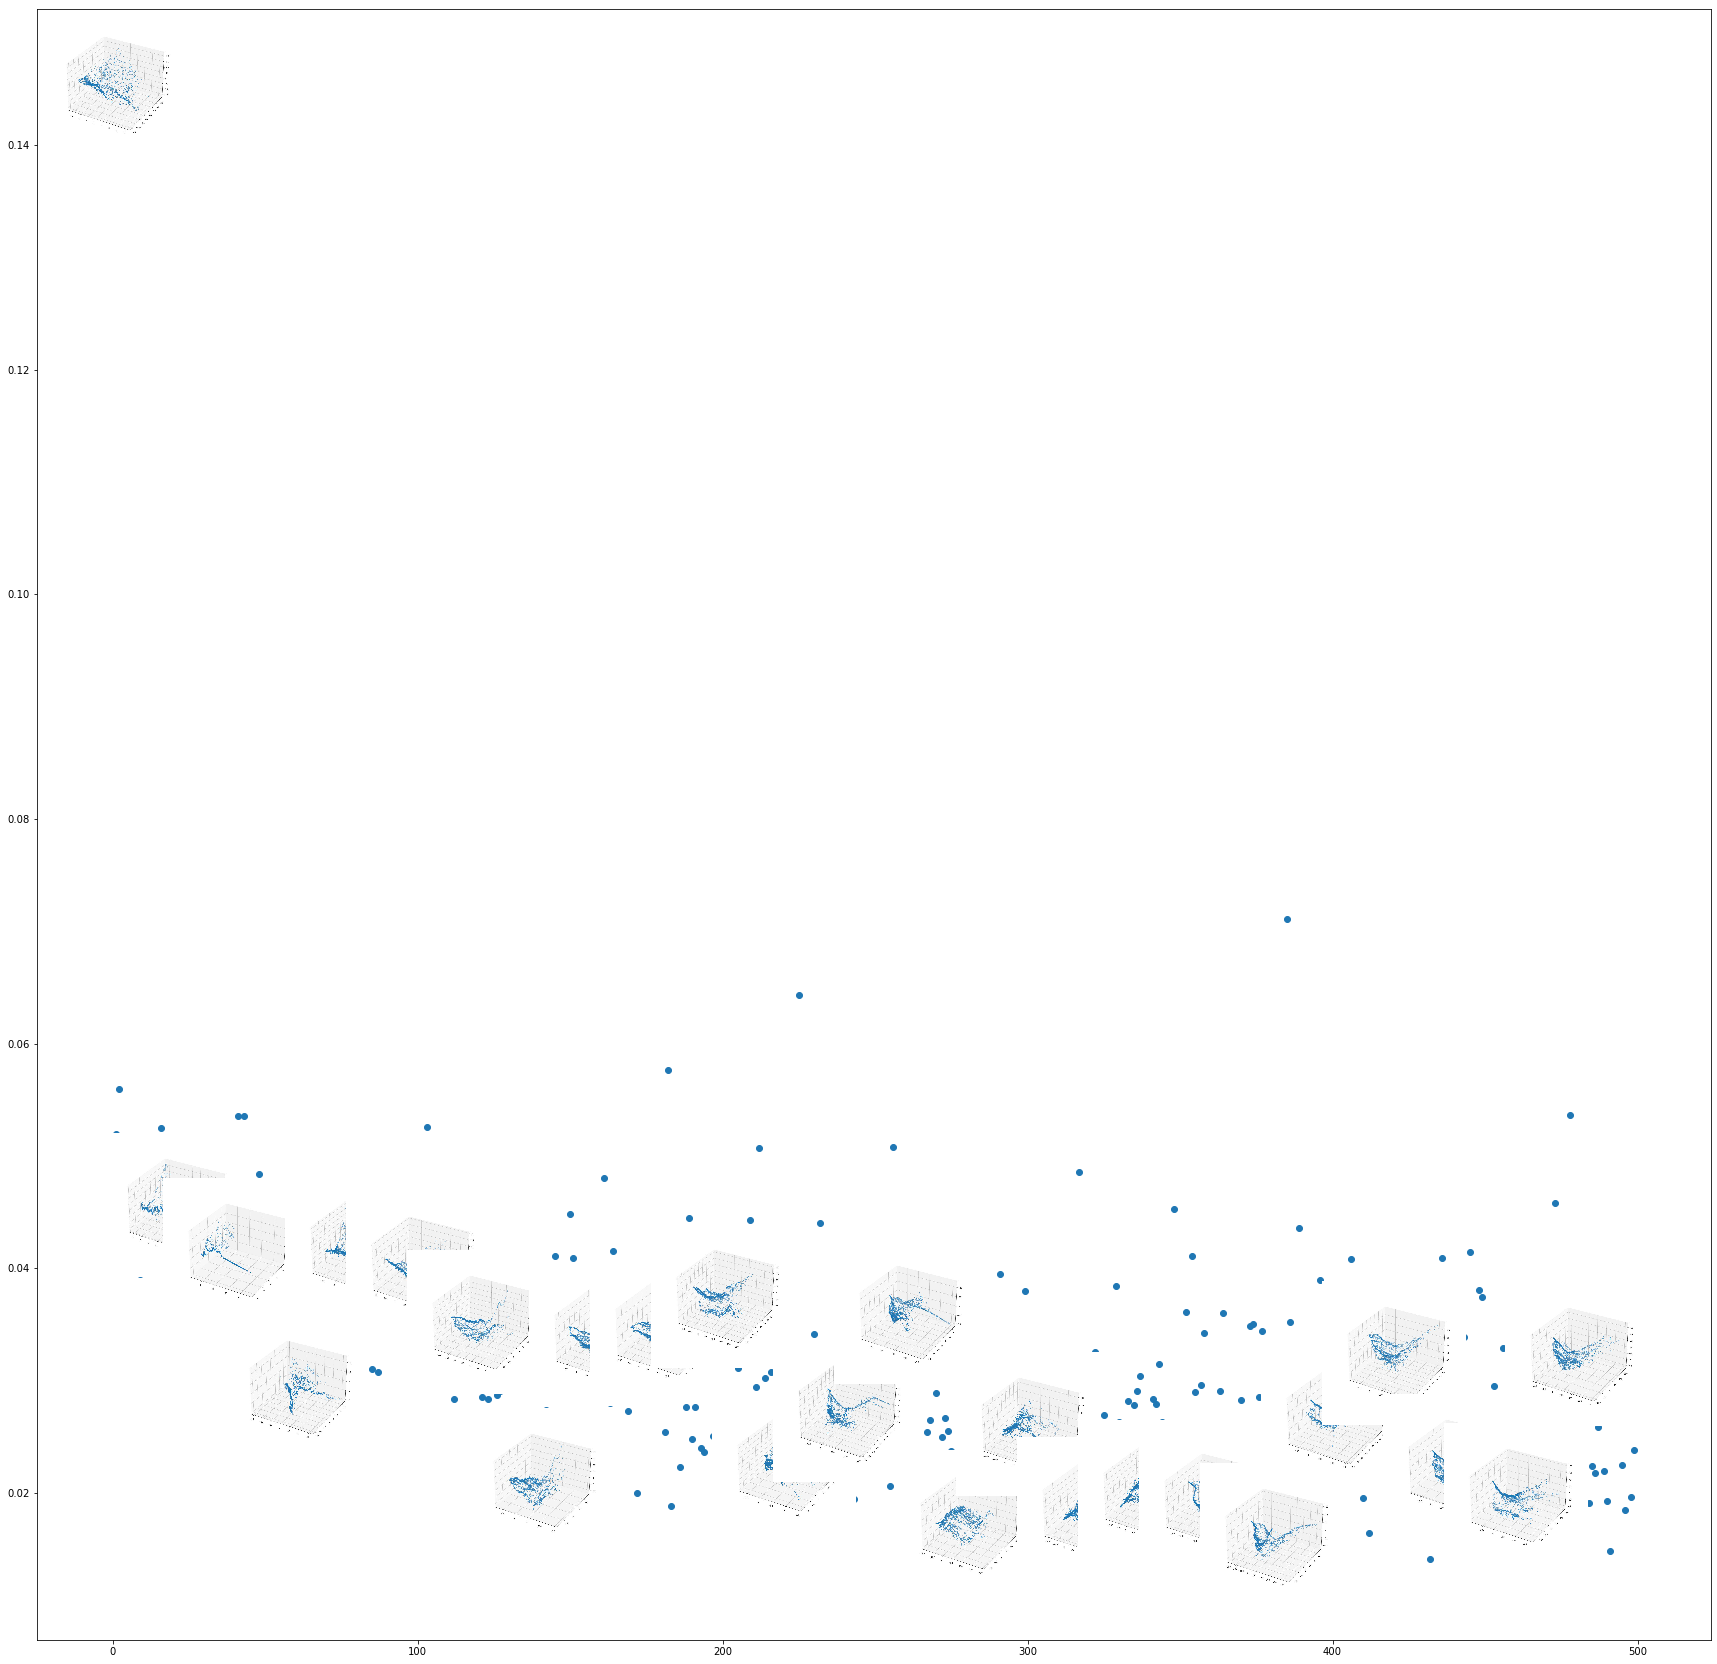

In [9]:
epochs = [i for i in range(len(val_losses))]
parent_dir = "/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Result_learning_representation"

def main(x,y):
    fig, ax = plt.subplots(figsize=(30,30))
    imscatter(x,y,  zoom=0.2, ax=ax)
    ax.scatter(x,y ,marker='o')   
    plt.show()

def imscatter(x, y, ax=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    artists = []
    i = 0
    for x0, y0 in zip(x, y):
        if np.mod(i,20) == 0:
            image = os.path.join(parent_dir,"Weather","fc2","step_"+str(i)+".jpg")
            if ax is None:
                ax = plt.gca()
            try:
                image = plt.imread(image)
            except TypeError:
                # Likely already an array.''..
                pass
            im = OffsetImage(image, zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
            artists.append(ax.add_artist(ab))
        i+=1
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main(epochs,val_losses)

In [12]:
## SPATIAL

In [10]:
train_loader = torch.utils.data.DataLoader(dataset_space_train,batch_size=BATCH_SIZE,shuffle = False )
val_loader = torch.utils.data.DataLoader(dataset_space_val,batch_size=BATCH_SIZE,shuffle = False )
test_loader_space = torch.utils.data.DataLoader(dataset_space_test,batch_size=1,shuffle = False ) #bATCH SIZE =1 HERE FOR THE DATASET ONLY, ELSE TAKE WHATEVER BATCH SIZE IN INDIVIDUAL MODE

In [ ]:
EPOCH = 500
Spatial_losses = []
training = Training()
model,val_losses = training.training_individual(5,Nodes_Second,Nodes_Third,EPOCH,train_loader,val_loader,test_loader_space,do_analysis,"Spatial")
Spatial_losses.append(val_losses)

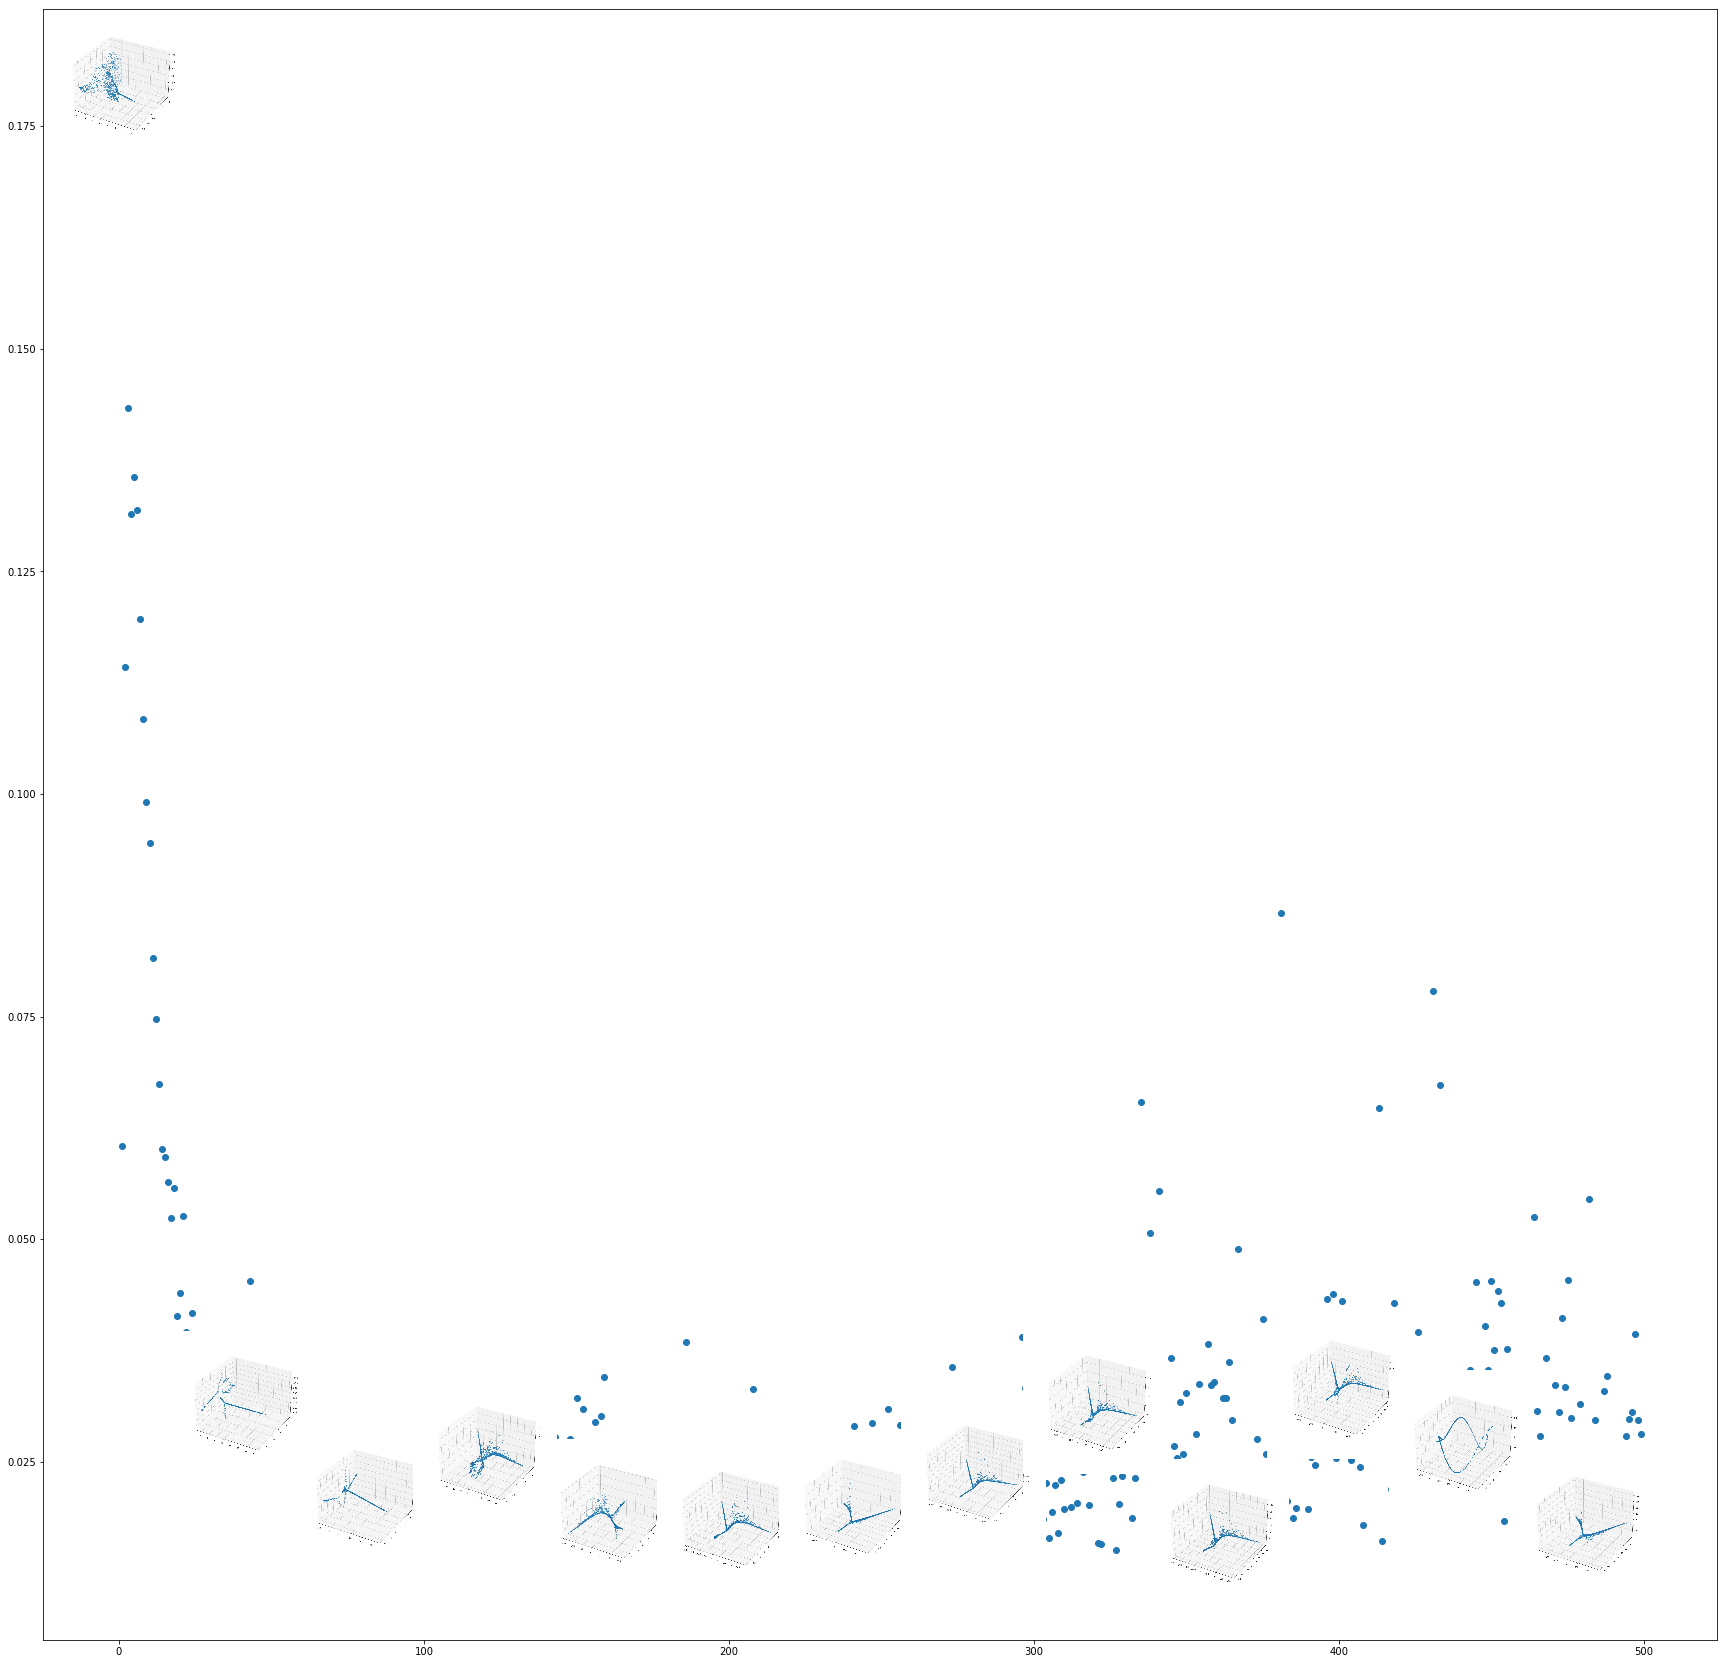

In [13]:
epochs = [i for i in range(len(val_losses))]
parent_dir = "/Users/charlottebeylier/Documents/PhD/Spatial and Conceptual Learning/github_code/Mono_Multi_TASK/Result_learning_representation"

def main(x,y):
    fig, ax = plt.subplots(figsize=(30,30))
    imscatter(x,y,  zoom=0.2, ax=ax)
    ax.scatter(x,y ,marker='o')   
    plt.show()

def imscatter(x, y, ax=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    artists = []
    i = 0
    for x0, y0 in zip(x, y):
        if np.mod(i,40) == 0:
            image = os.path.join(parent_dir,"Spatial","fc2","step_"+str(i)+".jpg")
            if ax is None:
                ax = plt.gca()
            try:
                image = plt.imread(image)
            except TypeError:
                # Likely already an array.''..
                pass
            im = OffsetImage(image, zoom=zoom)
            ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
            artists.append(ax.add_artist(ab))
        i+=1
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

main(epochs,val_losses)